## CIS 4526 Sp24 EDA Review Exercise

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [3]:
crash = pd.read_csv("data/car_crashes2.csv")
print(crash.shape)
# .head():returns a specified number of rows, string from the top
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
# .describe(): calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.817308,5.060235,5.574385,13.648154,14.043558,887.323654,134.865577
std,4.086070,2.033018,5.245624,4.497172,3.737999,176.559356,24.737451
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.775000,3.766500,3.897000,10.611000,11.434000,768.690000,114.732500
50%,15.650000,4.806000,4.629000,13.908000,14.141500,860.075000,136.590000
75%,18.450000,6.531000,5.640500,16.334500,16.719500,1006.347500,152.335000
max,23.900000,9.450000,40.642000,23.661000,21.280000,1301.520000,194.780000


## Question 1. Check if there are any null or NA

In [5]:
# .isnull().any(): if the columns in DataFrame contains null or N/A returns True.
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [6]:
# .dropna(): drop the row whcih contain null or na
crash = crash.dropna()
print(crash.isnull().any())

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool


## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

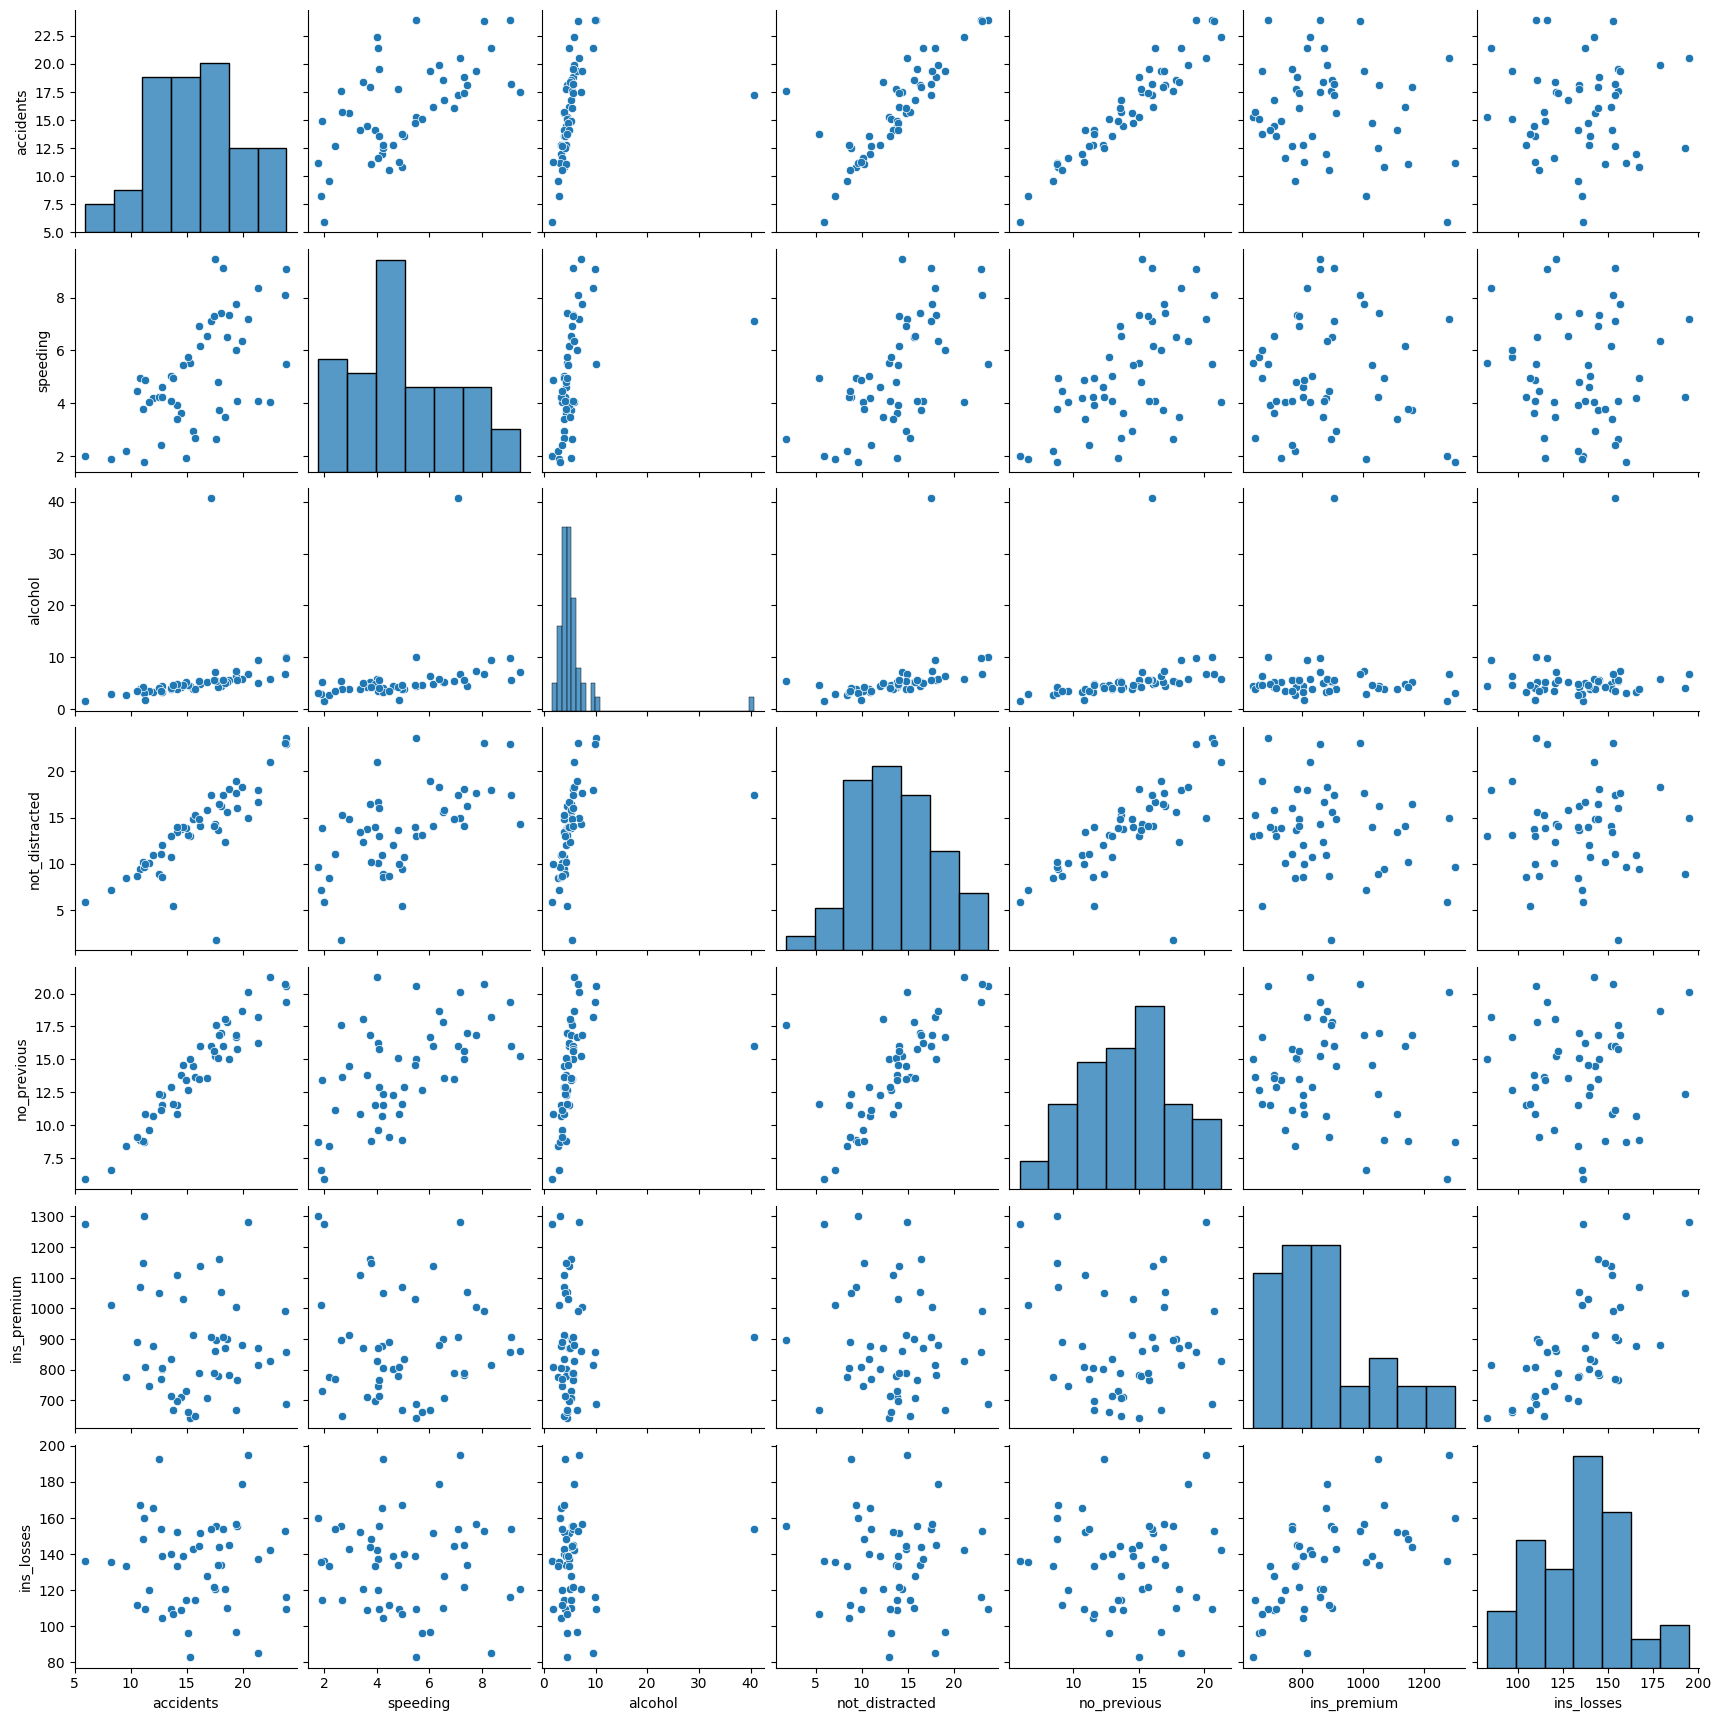

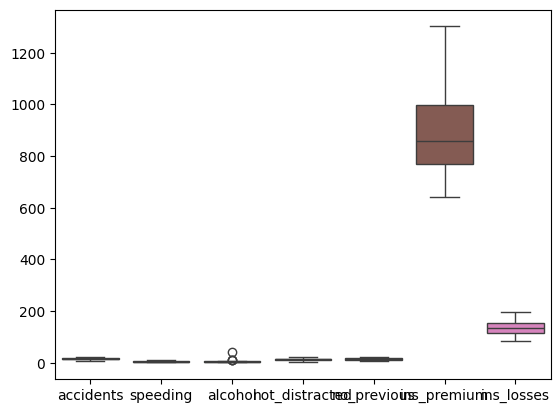

In [7]:
# Select columns which contain numerical data type
numerical_columns = crash.select_dtypes(include='number')

# Create scatter plots for numerical columns
sns.pairplot(numerical_columns)
plt.show()

# Create box plots for numerical columns
sns.boxplot(data=numerical_columns)
plt.show()


## Question 4. Display and Remove (the real) outliers

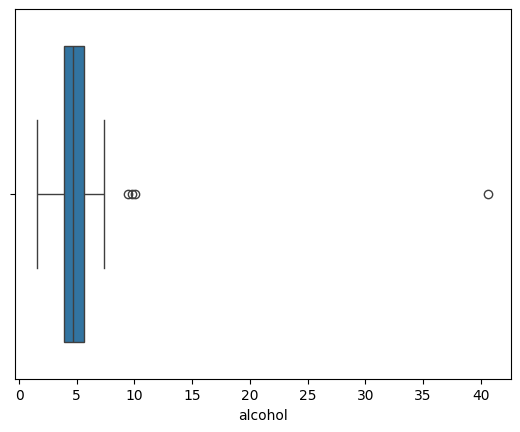

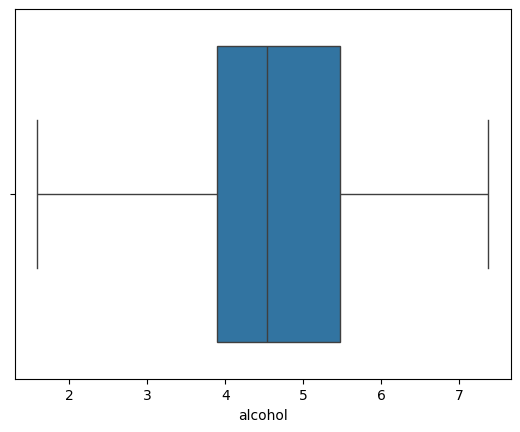

In [8]:
# calculate IQR for column Height
Q1 = crash['alcohol'].quantile(0.25)
Q3 = crash['alcohol'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = crash[(crash['alcohol'] < Q1 - threshold * IQR) | (crash['alcohol'] > Q3 + threshold * IQR)]
# Before dropping outliers
sns.boxplot(x= crash['alcohol'])
plt.show()
            
# drop rows containing outliers
crash = crash.drop(outliers.index)

# After dropping outliers
sns.boxplot(x = crash['alcohol'])

plt.show()

Q1 = crash['not_distracted']

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [9]:
print(ps.sqldf('''SELECT region, AVG(speeding) as Average_Speeing
FROM crash
WHERE region = 'Northeast' '''))

      region  Average_Speeing
0  Northeast          4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [10]:
print(ps.sqldf('''SELECT Region, AVG(alcohol) as 'Average acohol'
               FROM crash
               GROUP BY region'''))
               

      region  Average acohol
0    Midwest        4.538636
1  Northeast        3.980500
2      South        5.140625
3       West        4.365583


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [11]:
print(ps.sqldf('''SELECT Division,COUNT(speeding) as 'Occurrences', AVG(speeding) as 'Mean', MIN(speeding) as 'Min', MAX(speeding) as 'Max'
               FROM crash
               GROUP BY division'''))

             division  Occurrences      Mean    Min    Max
0  East North Central            5  4.106600  3.384  4.968
1  East South Central            4  4.533250  2.640  7.332
2     Middle Atlantic            2  5.446000  1.792  9.100
3            Mountain            7  5.450286  3.496  7.308
4         New England            6  4.084333  1.886  5.738
5             Pacific            5  5.949400  4.200  9.450
6      South Atlantic            8  4.524000  2.006  8.092
7  West North Central            6  4.092833  1.937  6.923
8  West South Central            4  6.333750  4.032  7.760


## Question 8. Answer Question 7 but use Pandas functions

In [12]:
result = crash.groupby(['division'])['speeding'].agg(['count', 'mean', 'min', 'max'])
print(result)

                    count      mean    min    max
division                                         
East North Central      5  4.106600  3.384  4.968
East South Central      4  4.533250  2.640  7.332
Middle Atlantic         2  5.446000  1.792  9.100
Mountain                7  5.450286  3.496  7.308
New England             6  4.084333  1.886  5.738
Pacific                 5  5.949400  4.200  9.450
South Atlantic          8  4.524000  2.006  8.092
West North Central      6  4.092833  1.937  6.923
West South Central      4  6.333750  4.032  7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region. Based on the results, describe any insights that you may have on the dataset ?

In [13]:
speeding_std = crash['speeding'].groupby(crash['region']).std()
alcohol_std = crash['alcohol'].groupby(crash['region']).std()
accidents_std = crash['accidents'].groupby(crash['region']).std()

# Skewness
speeding_skew = crash['speeding'].groupby(crash['region']).skew()
alcohol_skew = crash['alcohol'].groupby(crash['region']).skew()
accidents_skew = crash['accidents'].groupby(crash['region']).skew()

# Kurtosis
speeding_kurt = crash['speeding'].groupby(crash['region']).apply(lambda x: x.kurt())
alcohol_kurt = crash['alcohol'].groupby(crash['region']).apply(lambda x: x.kurt())
accidents_kurt = crash['accidents'].groupby(crash['region']).apply(lambda x: x.kurt())

# Concatenate the results into a single DataFrame
std_df = pd.concat([speeding_std, alcohol_std, accidents_std], axis = 1)
skew_df = pd.concat([speeding_skew, alcohol_skew, accidents_skew], axis =1)
kurt_df = pd.concat([speeding_kurt, alcohol_kurt, accidents_kurt], axis =1)

# Print the concatenated DataFrame
print("Standard Deviation",'\n',std_df)
print('\n Skew','\n',skew_df)
print('\n Kurtosis \n',kurt_df)

# Insights:
'''
The South region consistently shows higher variability and extreme values in all three variables (speeding, alcohol, and accidents).
The Midwest and West regions generally exhibit lower variability and flatter distributions.
The Northeast region tends to have lower variability in alcohol rates but shows variability in other aspects.
'''

Standard Deviation 
            speeding   alcohol  accidents
region                                  
Midwest    1.555957  0.942939   2.564761
Northeast  2.327773  0.872950   3.077453
South      2.050344  1.411977   4.408169
West       1.714838  1.356762   2.941281

 Skew 
            speeding   alcohol  accidents
region                                  
Midwest    0.337811  0.249644  -0.167044
Northeast  1.051666  0.764250   0.777587
South      0.131598 -0.901181  -1.218663
West       1.004101  0.221992  -0.163629

 Kurtosis 
            speeding   alcohol  accidents
region                                  
Midwest   -0.505108  1.119686   1.260480
Northeast  1.763520  0.890501   0.726713
South     -1.499308  1.522810   2.125231
West       0.660512  1.113007  -1.632801


'\nThe South region consistently shows higher variability and extreme values in all three variables (speeding, alcohol, and accidents).\nThe Midwest and West regions generally exhibit lower variability and flatter distributions.\nThe Northeast region tends to have lower variability in alcohol rates but shows variability in other aspects.\n'

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

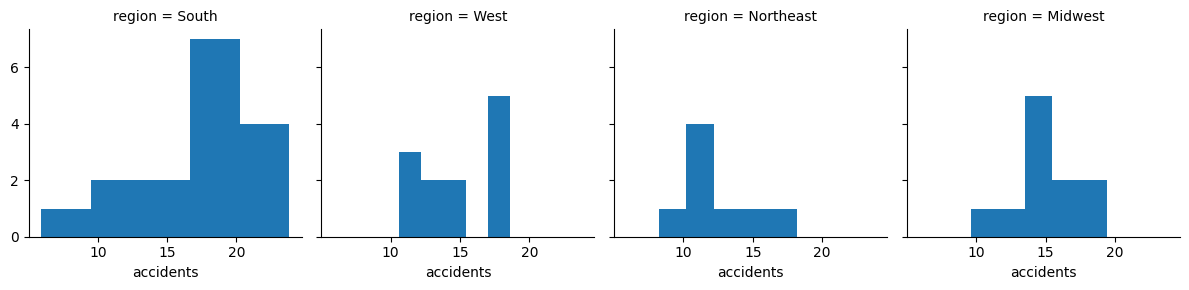

In [14]:
region_set = sns.FacetGrid(crash, col = 'region')
region_set = region_set.map(plt.hist, 'accidents', bins = 5)

### Now Load a different dataset (MPG dataset number 3)

In [15]:
mpg = pd.read_csv("data/mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 11: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [16]:
# Fill any missing values from the mean of its column
mpg.fillna(mpg.mean(numeric_only=True,skipna = True).round(1), inplace = True)
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool